In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utils import imread, showMatches
from utils import imread
from utils import showMatches
from detectBlobs import detectBlobs
from compute_sift import compute_sift
from computeMatches import computeMatches
from ransac import ransac
from mergeImages import mergeImages
from drawBlobs import drawBlobs
from scipy.spatial.distance import cdist
%matplotlib inline

/home/ec2-user/anaconda3/envs/python2/lib/python2.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


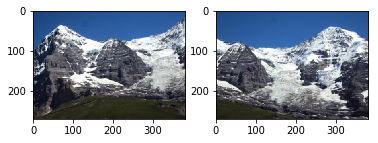

In [197]:
#Image directory
dataDir = os.path.join('..', 'data', 'stitching')

#Read input images
testExamples = ['hill', 'field', 'ledge', 'pier', 'river' 'roofs', 'building', 'uttower']
exampleIndex = 0
imageName1 = '{}1_r.jpg'.format(testExamples[exampleIndex])
imageName2 = '{}2_r.jpg'.format(testExamples[exampleIndex])
im1 = imread(os.path.join(dataDir, imageName1))
im2 = imread(os.path.join(dataDir, imageName2))
plt.subplot(1, 2, 1)
plt.imshow(im1)
plt.subplot(1, 2, 2)
plt.imshow(im2)

In [198]:
#Detect keypoints
blobs1 = detectBlobs(im1)
blobs2 = detectBlobs(im2)

#Compute SIFT features
sift1 = compute_sift(im1, blobs1[:, 0:4])
sift2 = compute_sift(im2, blobs2[:, 0:4])

sift1_tr = sift1.T
sift2_tr = sift2.T

In [ ]:
drawBlobs(im1, blobs1)

In [ ]:
drawBlobs(im1, blobs2)

In [206]:
def computeMatches(f1, f2):
    reject_limit = .55
    matches = []
    distance_matrix = cdist(f1, f2)
    
    smallest = f1
    if (f1.shape[0] > f2.shape[0]):
        smallest = f2
    
    for n in range(smallest.shape[0]):
        currd_matrix = distance_matrix[n]
        if (np.min(currd_matrix) / np.partition(currd_matrix, 2)[1]) <= reject_limit:
            matches.append([n])
    matches = np.squeeze(np.array(matches))
    return matches

In [207]:
matches = computeMatches(sift1, sift2)

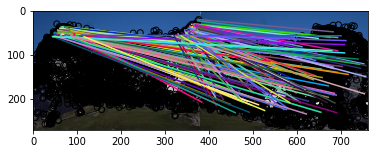

In [208]:
showMatches(im1, im2, blobs1, blobs2, matches)

In [289]:
def ransac1(matches, blobs1, blobs2):
    pairs = int(matches.shape[0] * .3)
    max_iteration = 1000
    reject_limit = 20
    
    match_blob1 = blobs1[matches]
    match_blob2 = blobs2[matches]
    total_inliers, best_inlier_model = 0, np.zeros(matches.shape[0])
    for n in range(max_iteration):
        idxs = np.random.choice(matches.shape[0], pairs)
        matching1 = match_blob1[idxs, :]
        matching2 = match_blob2[idxs, :]
        transf = np.linalg.lstsq(matching2, matching1, rcond=None)[0]
        transf[:, 2] = np.array([0, 0, 1])
        curr_inliers = np.power(np.linalg.norm(np.dot(match_blob2, transf) - match_blob1, axis=1), 2) < reject_limit
        if curr_inliers.sum() > total_inliers:
            print ("Uauua")
            total_inliers = curr_inliers.sum()
            best_inlier_model = curr_inliers.copy()     
    transf = np.linalg.lstsq(match_blob2[best_inlier_model], match_blob1[best_inlier_model], rcond=None)[0]
    
    if np.sum(transf - np.eye(3)) == 0:
        best_inlier_model = -1
    
    return best_inlier_model, transf[:2, :3]

In [290]:
inliers, transf = ransac1(matches, blobs1[:, [0, 1, 3]],  blobs2[:, [0, 1, 3]])

Uauua


In [291]:
transf = transf[:2, :3]
transf.shape

(2, 3)

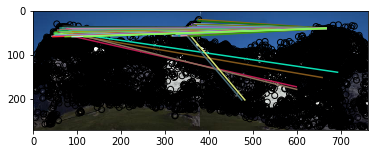

In [270]:
goodMatches = np.zeros_like(matches)
goodMatches[inliers] = matches[inliers]
showMatches(im1, im2, blobs1, blobs2, goodMatches)

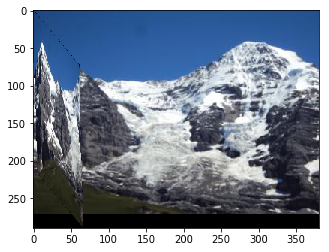

In [292]:
stitchIm = mergeImages(im2, im1, transf)
plt.figure()
plt.imshow(stitchIm)

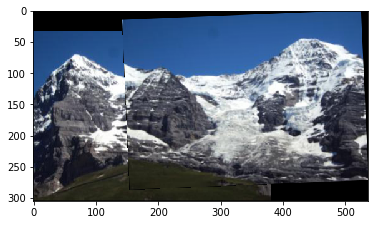

In [217]:
dataDir = os.path.join('..', 'data', 'stitching')
im1 = imread("../data/stitching/hill1_r.jpg")
im2 = imread("../data/stitching/hill2_r.jpg")
transf = np.array([[1.0047, 0.0445, 141.4735],
        [-0.0409, 1.0012, -17.7628]])
stitched = mergeImages(im1, im2, transf)
plt.imshow(stitched)
plt.show()

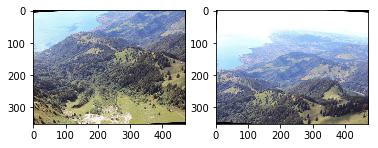

In [190]:
plt.subplot(1, 2, 1)
plt.imshow(im1)
plt.subplot(1, 2, 2)
plt.imshow(im2)

In [ ]:
goodMatches

In [ ]:
matches.shape

In [ ]:
goodMatches.shape

In [ ]:
m1 = matches
m2 = matches

In [ ]:
a1 = np.array([[1, 3, 4], [2, 5, 4], [2, 9, 1]])
np.sum(a1)

In [ ]:
a1.sum()